# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


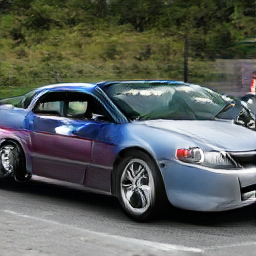

In [22]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample
from PIL import Image
import numpy as np

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')

# Generate truncated noise and class vector (e.g., for 'banana')
truncation = 0.5
#equivalent to the latent vector
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1) # made changes here (w/ first param)
class_vector = one_hot_from_names(['car'], batch_size=1) # made changes here (w/ first param)

# Convert to torch tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Convert to image format
output = output.squeeze().permute(1, 2, 0).cpu().numpy()
output = (output + 1) / 2  # BigGAN outputs in [-1, 1]
output = (output * 255).astype(np.uint8)

Image.fromarray(output)

In [ ]:
# Experiment with different latent vectors
latent_vector = torch.randn(1, 128)  # Change this to explore different random vectors
with torch.no_grad():
    generated_image = model(latent_vector)
generated_image = generated_image.squeeze().cpu().numpy()
generated_image = (generated_image * 255).astype('uint8')
Image.fromarray(generated_image)

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?